<a href="https://colab.research.google.com/github/dilp90/PDI/blob/main/PDI_5_Transformacion_Afin_y_Radial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Transformación geométrica: afín y radial**

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Transformación afín**

In [22]:
# Cargar la imagen en escala de grises
imagen = cv2.imread("/content/platano.jpg", cv2.IMREAD_GRAYSCALE)

# Definir puntos originales (antes de la transformación)
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])

# Definir nuevos puntos transformados
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

# Obtener la matriz de transformación afín
M = cv2.getAffineTransform(pts1, pts2)

# Aplicar la transformación
filas, columnas = imagen.shape
imagen_transformada = cv2.warpAffine(imagen, M, (columnas, filas))

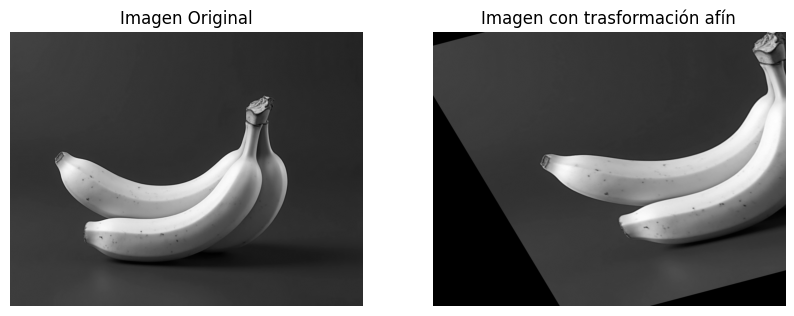

In [23]:
# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(imagen_transformada, cmap="gray")
plt.title("Imagen con trasformación afín")
plt.axis("off")

plt.show()

**Transformación radial o distorsión radial**

In [24]:
# Matriz de calibración de la cámara y coeficientes de distorsión (valores de ejemplo)
K = np.array([[1000, 0, 640], [0, 1000, 360], [0, 0, 1]])  # Matriz intrínseca
dist_coef = np.array([-0.2, 0.05, 0, 0, 0])  # Coeficientes de distorsión radial

# Corregir la distorsión radial
h, w = imagen.shape[:2]
new_K, roi = cv2.getOptimalNewCameraMatrix(K, dist_coef, (w, h), 1, (w, h))
imagen_corregida = cv2.undistort(imagen, K, dist_coef, None, new_K)

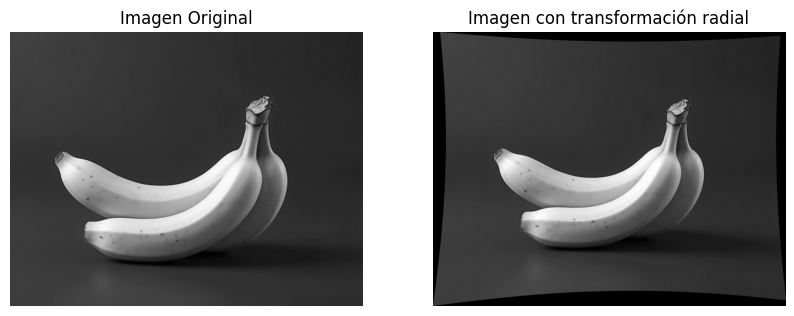

In [25]:
# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap="gray")
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(imagen_corregida, cmap="gray")
plt.title("Imagen con transformación radial")
plt.axis("off")

plt.show()